# Visu 8: Width histogram

## Presentation

**Data**:\
106 pictures taken at 100x magnification of hyphae in one plate.\
All types of hyphea (big runner, runner, bas, ..) are represented.\
The width is then labeled with `labelme`.

**Plate**:\
The plate is plate number 1050.\
It is of strain C2. Treatment is 100C.\
The crossing was observed on 09/05.

**Conclusion**:\
Values go from 2.3 to 12.5 micrometers.\
Median is 4.7 micrometers.

## Setup

In [7]:
import os
import matplotlib.pyplot as plt

from amftrack.util.sys import storage_path

## Plate overview

In [13]:
full_stiched_path = os.path.join(storage_path, "plate1050", "20220513_0839_Plate18", "StitchedImage.png")

## Get data

### Fetch segments

In [23]:
import random
import json

source = os.path.join(storage_path, "plate1050_width")

def is_valid(name):
    return ".json" in name

segments = {}
for file in os.listdir(source):
    if is_valid(file):
        path = os.path.join(source, file)
        with open(path) as f:
            json_from_file = json.load(f)
        for shape in json_from_file["shapes"]:
            if shape["label"] == "width":
                segments[file] = shape["points"]

### Convert setgment to width

In [31]:
import numpy as np
from amftrack.util.image_analysis import convert_to_micrometer

labels = {}

for key in segments.keys():
    point1 = np.array(segments[key][0])
    point2 = np.array(segments[key][1])
    length = convert_to_micrometer(
                np.linalg.norm(point1 - point2), magnification=100
            )
    labels[key] = length

## Data visualisation

In [37]:
import pandas as pd

In [32]:
values = [labels[key] for key in labels.keys()]

(array([ 8., 15., 10.,  6.,  8., 12., 11., 11.,  6.,  6.,  7.,  0.,  1.,
         0.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2.28162126,  2.7267886 ,  3.17195593,  3.61712327,  4.06229061,
         4.50745795,  4.95262529,  5.39779263,  5.84295997,  6.2881273 ,
         6.73329464,  7.17846198,  7.62362932,  8.06879666,  8.513964  ,
         8.95913134,  9.40429867,  9.84946601, 10.29463335, 10.73980069,
        11.18496803, 11.63013537, 12.07530271, 12.52047004]),
 <a list of 23 Patch objects>)

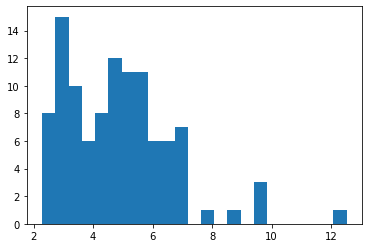

In [42]:
plt.hist(values, bins = 23)

In [38]:
serie = pd.Series(values)

In [39]:
serie.describe()

count    106.000000
mean       4.819916
std        1.801394
min        2.281621
25%        3.308409
50%        4.714272
75%        5.755497
max       12.520470
dtype: float64